# Explore housing affordability in New York Metro Area

# Table of Contents

* [Chapter 1](#chapter1)
    * [Section 1.1](#section_1_1)
    * [Section 1.2](sSection_1_2)
        * [Section 1.2.1](#section_1_2_1)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

# Prepare for analysis

Import libraries 

In [1]:
# for general data wrangling tasks
import pandas as pd
# to give more power to your figures (plots)
import matplotlib.pyplot as plt
# to read and visualize spatial data
import geopandas as gpd

Import data: I'm analyzing housing affordability data in New York Metro Area today, and I will upload the data now. Since the dataset is in csv format, we need to do some work about it before we start data analyzing and plotting. 
Data source: https://www.huduser.gov/portal/datasets/cp.html#2006-2017_query

In [2]:
#use .read_csv command to import data
hao = pd.read_csv('housing affordability NYMR-owner.csv')

I want to know how many rows/columns there are in the dataset

In [3]:
hao.shape

(31, 138)

There are 138 columns! That's a lot of columns. 

Let's look at the first 5 rows of this dataset with the `.head` command

In [4]:
hao.head()

,source,sumlevel,geoid,name,st,cnty,T7_est1,T7_est2,T7_est3,T7_est4,...,T7_est123,T7_est124,T7_est125,T7_est126,T7_est127,T7_est128,T7_est129,T7_est130,T7_est131,T7_est132
0,2013thru2017,50,05000US34021,"Mercer County, New Jersey",34021,21,129545,83190,5895,670,...,3635,3025,555,55,0,5515,4540,845,130,0
1,2013thru2017,50,05000US34003,"Bergen County, New Jersey",34003,3,337820,218065,15195,2735,...,8440,7080,1085,275,0,11060,8430,2140,485,0
2,2013thru2017,50,05000US34013,"Essex County, New Jersey",34013,13,280325,124850,8755,1235,...,4790,3670,900,220,0,6695,5070,1370,250,0
3,2013thru2017,50,05000US34017,"Hudson County, New Jersey",34017,17,252350,79115,5005,775,...,2280,1945,220,115,0,10890,8485,2000,400,0
4,2013thru2017,50,05000US34023,"Middlesex County, New Jersey",34023,23,283795,180485,14270,2300,...,5155,4440,610,100,0,9170,7500,1430,240,0


There are some columns that do not really matter to our analysis. The goal of this analysis is to plot housing affordability of each county on the map and show the difference betweeen each. So the "source" and "sumlevel" columns do not really matter, but I still need to see all the columns to decide if there are more columns we need to discard.

Wiht the `display.max_columns`,`display.max_rows` and `.sampel`  and we can see all the columns and rows to determine if there is anything else we want to discard

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
hao.sample(31)

,source,sumlevel,geoid,name,st,cnty,T7_est1,T7_est2,T7_est3,T7_est4,T7_est5,T7_est6,T7_est7,T7_est8,T7_est9,T7_est10,T7_est11,T7_est12,T7_est13,T7_est14,T7_est15,T7_est16,T7_est17,T7_est18,T7_est19,T7_est20,T7_est21,T7_est22,T7_est23,T7_est24,T7_est25,T7_est26,T7_est27,T7_est28,T7_est29,T7_est30,T7_est31,T7_est32,T7_est33,T7_est34,T7_est35,T7_est36,T7_est37,T7_est38,T7_est39,T7_est40,T7_est41,T7_est42,T7_est43,T7_est44,T7_est45,T7_est46,T7_est47,T7_est48,T7_est49,T7_est50,T7_est51,T7_est52,T7_est53,T7_est54,T7_est55,T7_est56,T7_est57,T7_est58,T7_est59,T7_est60,T7_est61,T7_est62,T7_est63,T7_est64,T7_est65,T7_est66,T7_est67,T7_est68,T7_est69,T7_est70,T7_est71,T7_est72,T7_est73,T7_est74,T7_est75,T7_est76,T7_est77,T7_est78,T7_est79,T7_est80,T7_est81,T7_est82,T7_est83,T7_est84,T7_est85,T7_est86,T7_est87,T7_est88,T7_est89,T7_est90,T7_est91,T7_est92,T7_est93,T7_est94,T7_est95,T7_est96,T7_est97,T7_est98,T7_est99,T7_est100,T7_est101,T7_est102,T7_est103,T7_est104,T7_est105,T7_est106,T7_est107,T7_est108,T7_est109,T7_est110,T7_est111,T7_est112,T7_est113,T7_est114,T7_est115,T7_est116,T7_est117,T7_est118,T7_est119,T7_est120,T7_est121,T7_est122,T7_est123,T7_est124,T7_est125,T7_est126,T7_est127,T7_est128,T7_est129,T7_est130,T7_est131,T7_est132
1,2013thru2017,50,05000US34003,"Bergen County, New Jersey",34003,3,337820,218065,15195,2735,115,145,2300,175,2800,40,150,2355,260,815,30,35,725,25,6915,265,365,5915,375,1930,60,55,1355,460,16555,4730,600,2205,1925,0,3600,300,700,2600,0,1360,80,330,950,0,5595,610,2175,2810,0,1270,250,250,770,0,17905,4895,2110,1600,1180,0,6260,1280,1970,3005,0,1380,375,435,570,0,3770,1575,1420,775,0,1600,425,545,635,0,15555,4075,2405,1240,435,0,6145,2140,2445,1565,0,1700,730,645,325,0,2180,1370,575,235,0,1450,520,495,435,0,152860,26160,22665,2530,960,0,88200,71850,13965,2390,0,19000,15880,2720,400,0,8440,7080,1085,275,0,11060,8430,2140,485,0
13,2013thru2017,50,05000US36005,"Bronx County, New York",36005,5,495355,97660,11285,1805,235,185,1345,40,2430,380,195,1630,220,725,65,105,530,25,4560,860,600,2840,260,1765,325,125,1050,270,11615,2010,780,595,640,0,3895,1125,625,2145,0,1265,400,245,620,0,3330,1675,790,870,0,1115,295,285,540,0,18105,3685,2395,575,710,0,6420,2855,1750,1815,0,2305,775,970,555,0,3155,2300,410,445,0,2545,1770,290,485,0,11635,2050,1280,425,345,0,5070,2765,1760,545,0,1525,725,655,150,0,1335,1105,150,80,0,1655,1210,295,145,0,45015,6320,5650,585,85,0,23270,19705,3005,555,0,6460,5655,770,35,0,3375,2940,350,85,0,5595,4455,925,215,0
15,2013thru2017,50,05000US36047,"Kings County, New York",36047,47,944650,283750,32690,5280,410,915,3630,320,8170,755,1010,5860,545,3545,415,310,2670,150,10955,1370,1385,7445,750,4740,460,245,2870,1165,31295,6655,2075,1975,2610,0,9335,2160,1655,5520,0,4765,1050,760,2955,0,7440,2430,2415,2595,0,3105,1000,555,1545,0,45925,8830,5025,1855,1950,0,16905,6385,4555,5965,0,7825,2600,2670,2555,0,6730,4075,1410,1245,0,5640,2685,1065,1890,0,27520,4900,3355,985,560,0,12570,5785,4280,2505,0,4465,2245,1675,545,0,2585,1895,385,310,0,3000,1945,485,575,0,146320,20925,18035,2340,555,0,77010,64125,11020,1865,0,21130,17930,2925,280,0,8305,6930,990,390,0,18945,15105,2835,1005,0
8,2013thru2017,50,05000US34031,"Passaic County, New Jersey",34031,31,162440,86900,7290,1275,20,120,1065,70,1550,35,125,1315,75,535,0,60,465,10,2955,145,180,2470,155,975,75,50,665,185,8555,2185,325,780,1085,0,2455,190,430,1835,0,975,65,250,660,0,2325,170,1045,1110,0,615,90,110,415,0,8955,2180,855,855,470,0,3410,645,1410,1355,0,1025,320,315,390,0,1610,590,720,305,0,730,210,230,285,0,8850,1750,1260,305,180,0,3655,1335,1710,610,0,1360,555,730,70,0,1290,890,225,175,0,800,210,390,200,0,53245,9030,7575,1300,155,0,30160,25445,4115,600,0,6825,5790,1000,35,0,2710,2190,420,100,0,4520,3105,1260,155,0
6,2013thru2017,50,05000US34027,"Morris County, New Jersey",34027,27,180125,135195,6365,1010,45,105,785,75,1070,0,25,950,95,295,4,45,205,40,2925,205,220,2285,220,1065,0,15,890,160,7665,2015,300,800,920,0,1355,135,245,980,0,505,30,45,430,0,2955,650,108

It looks like the "source" and "sumlevel" are the only two columns I want to discard, let's use `.list` to get the full list of columns.

In [7]:
list(hao)

['source',
 'sumlevel',
 'geoid',
 'name',
 'st',
 'cnty',
 'T7_est1',
 'T7_est2',
 'T7_est3',
 'T7_est4',
 'T7_est5',
 'T7_est6',
 'T7_est7',
 'T7_est8',
 'T7_est9',
 'T7_est10',
 'T7_est11',
 'T7_est12',
 'T7_est13',
 'T7_est14',
 'T7_est15',
 'T7_est16',
 'T7_est17',
 'T7_est18',
 'T7_est19',
 'T7_est20',
 'T7_est21',
 'T7_est22',
 'T7_est23',
 'T7_est24',
 'T7_est25',
 'T7_est26',
 'T7_est27',
 'T7_est28',
 'T7_est29',
 'T7_est30',
 'T7_est31',
 'T7_est32',
 'T7_est33',
 'T7_est34',
 'T7_est35',
 'T7_est36',
 'T7_est37',
 'T7_est38',
 'T7_est39',
 'T7_est40',
 'T7_est41',
 'T7_est42',
 'T7_est43',
 'T7_est44',
 'T7_est45',
 'T7_est46',
 'T7_est47',
 'T7_est48',
 'T7_est49',
 'T7_est50',
 'T7_est51',
 'T7_est52',
 'T7_est53',
 'T7_est54',
 'T7_est55',
 'T7_est56',
 'T7_est57',
 'T7_est58',
 'T7_est59',
 'T7_est60',
 'T7_est61',
 'T7_est62',
 'T7_est63',
 'T7_est64',
 'T7_est65',
 'T7_est66',
 'T7_est67',
 'T7_est68',
 'T7_est69',
 'T7_est70',
 'T7_est71',
 'T7_est72',
 'T7_est73',
 

Let's use  create a new datafram "columns_to_keep" to inlude only the columns we want to keep and redefine the datafram. 

In [8]:
columns_to_keep= ['geoid', 'name','st','cnty','T7_est1','T7_est2','T7_est3','T7_est4','T7_est5','T7_est6','T7_est7','T7_est8','T7_est9',
 'T7_est10',
 'T7_est11',
 'T7_est12',
 'T7_est13',
 'T7_est14',
 'T7_est15',
 'T7_est16',
 'T7_est17',
 'T7_est18',
 'T7_est19',
 'T7_est20',
 'T7_est21',
 'T7_est22',
 'T7_est23',
 'T7_est24',
 'T7_est25',
 'T7_est26',
 'T7_est27',
 'T7_est28',
 'T7_est29',
 'T7_est30',
 'T7_est31',
 'T7_est32',
 'T7_est33',
 'T7_est34',
 'T7_est35',
 'T7_est36',
 'T7_est37',
 'T7_est38',
 'T7_est39',
 'T7_est40',
 'T7_est41',
 'T7_est42',
 'T7_est43',
 'T7_est44',
 'T7_est45',
 'T7_est46',
 'T7_est47',
 'T7_est48',
 'T7_est49',
 'T7_est50',
 'T7_est51',
 'T7_est52',
 'T7_est53',
 'T7_est54',
 'T7_est55',
 'T7_est56',
 'T7_est57',
 'T7_est58',
 'T7_est59',
 'T7_est60',
 'T7_est61',
 'T7_est62',
 'T7_est63',
 'T7_est64',
 'T7_est65',
 'T7_est66',
 'T7_est67',
 'T7_est68',
 'T7_est69',
 'T7_est70',
 'T7_est71',
 'T7_est72',
 'T7_est73',
 'T7_est74',
 'T7_est75',
 'T7_est76',
 'T7_est77',
 'T7_est78',
 'T7_est79',
 'T7_est80',
 'T7_est81',
 'T7_est82',
 'T7_est83',
 'T7_est84',
 'T7_est85',
 'T7_est86',
 'T7_est87',
 'T7_est88',
 'T7_est89',
 'T7_est90',
 'T7_est91',
 'T7_est92',
 'T7_est93',
 'T7_est94',
 'T7_est95',
 'T7_est96',
 'T7_est97',
 'T7_est98',
 'T7_est99',
 'T7_est100',
 'T7_est101',
 'T7_est102',
 'T7_est103',
 'T7_est104',
 'T7_est105',
 'T7_est106',
 'T7_est107',
 'T7_est108',
 'T7_est109',
 'T7_est110',
 'T7_est111',
 'T7_est112',
 'T7_est113',
 'T7_est114',
 'T7_est115',
 'T7_est116',
 'T7_est117',
 'T7_est118',
 'T7_est119',
 'T7_est120',
 'T7_est121',
 'T7_est122',
 'T7_est123',
 'T7_est124',
 'T7_est125',
 'T7_est126',
 'T7_est127',
 'T7_est128',
 'T7_est129',
 'T7_est130',
 'T7_est131',
 'T7_est132']

In [9]:
hao = hao[columns_to_keep]

Let's check if we discard the unwanted columns with `.head`.

In [10]:
hao.head()

,geoid,name,st,cnty,T7_est1,T7_est2,T7_est3,T7_est4,T7_est5,T7_est6,T7_est7,T7_est8,T7_est9,T7_est10,T7_est11,T7_est12,T7_est13,T7_est14,T7_est15,T7_est16,T7_est17,T7_est18,T7_est19,T7_est20,T7_est21,T7_est22,T7_est23,T7_est24,T7_est25,T7_est26,T7_est27,T7_est28,T7_est29,T7_est30,T7_est31,T7_est32,T7_est33,T7_est34,T7_est35,T7_est36,T7_est37,T7_est38,T7_est39,T7_est40,T7_est41,T7_est42,T7_est43,T7_est44,T7_est45,T7_est46,T7_est47,T7_est48,T7_est49,T7_est50,T7_est51,T7_est52,T7_est53,T7_est54,T7_est55,T7_est56,T7_est57,T7_est58,T7_est59,T7_est60,T7_est61,T7_est62,T7_est63,T7_est64,T7_est65,T7_est66,T7_est67,T7_est68,T7_est69,T7_est70,T7_est71,T7_est72,T7_est73,T7_est74,T7_est75,T7_est76,T7_est77,T7_est78,T7_est79,T7_est80,T7_est81,T7_est82,T7_est83,T7_est84,T7_est85,T7_est86,T7_est87,T7_est88,T7_est89,T7_est90,T7_est91,T7_est92,T7_est93,T7_est94,T7_est95,T7_est96,T7_est97,T7_est98,T7_est99,T7_est100,T7_est101,T7_est102,T7_est103,T7_est104,T7_est105,T7_est106,T7_est107,T7_est108,T7_est109,T7_est110,T7_est111,T7_est112,T7_est113,T7_est114,T7_est115,T7_est116,T7_est117,T7_est118,T7_est119,T7_est120,T7_est121,T7_est122,T7_est123,T7_est124,T7_est125,T7_est126,T7_est127,T7_est128,T7_est129,T7_est130,T7_est131,T7_est132
0,05000US34021,"Mercer County, New Jersey",34021,21,129545,83190,5895,670,45,65,525,35,1460,70,165,1060,165,255,0,65,190,0,2400,130,485,1715,70,1110,40,90,750,230,6580,1305,375,455,475,0,1965,340,655,970,0,675,125,205,345,0,2005,525,895,590,0,630,185,210,235,0,7270,1555,875,455,225,0,2480,1225,790,465,0,825,350,365,115,0,1485,870,370,245,0,925,400,300,225,0,7075,1650,1185,410,60,0,2635,1445,890,300,0,640,430,105,105,0,1030,715,245,75,0,1115,560,490,65,0,56370,10300,9225,900,175,0,31910,28625,2950,335,0,5010,4265,625,120,0,3635,3025,555,55,0,5515,4540,845,130,0
1,05000US34003,"Bergen County, New Jersey",34003,3,337820,218065,15195,2735,115,145,2300,175,2800,40,150,2355,260,815,30,35,725,25,6915,265,365,5915,375,1930,60,55,1355,460,16555,4730,600,2205,1925,0,3600,300,700,2600,0,1360,80,330,950,0,5595,610,2175,2810,0,1270,250,250,770,0,17905,4895,2110,1600,1180,0,6260,1280,1970,3005,0,1380,375,435,570,0,3770,1575,1420,775,0,1600,425,545,635,0,15555,4075,2405,1240,435,0,6145,2140,2445,1565,0,1700,730,645,325,0,2180,1370,575,235,0,1450,520,495,435,0,152860,26160,22665,2530,960,0,88200,71850,13965,2390,0,19000,15880,2720,400,0,8440,7080,1085,275,0,11060,8430,2140,485,0
2,05000US34013,"Essex County, New Jersey",34013,13,280325,124850,8755,1235,20,140,1005,65,2205,85,100,1800,220,460,0,30,395,35,3380,95,215,2935,135,1475,40,30,1170,235,10465,2360,370,830,1160,0,2980,320,500,2155,0,880,80,140,660,0,3150,255,785,2105,0,1100,135,155,810,0,13620,3135,1140,1040,960,0,4990,1055,1670,2265,0,1840,435,1010,390,0,2245,600,1005,640,0,1410,295,370,745,0,10460,2110,1180,525,400,0,4575,1430,2110,1035,0,1195,575,475,145,0,1275,665,425,185,0,1305,395,580,330,0,81550,12560,10325,1835,405,0,47660,39815,6695,1150,0,9845,8605,1130,110,0,4790,3670,900,220,0,6695,5070,1370,250,0
3,05000US34017,"Hudson County, New Jersey",34017,17,252350,79115,5005,775,35,40,660,40,990,20,0,800,170,290,4,20,250,15,1900,40,105,1545,210,1050,15,50,735,250,6595,1330,140,395,800,0,1860,175,480,1210,0,545,105,95,345,0,2125,150,690,1285,0,735,30,170,535,0,10440,2195,760,730,705,0,3930,1000,1275,1660,0,1350,355,450,550,0,1880,545,680,655,0,1080,365,215,500,0,7470,1390,795,390,205,0,3180,1090,1500,590,0,1070,410,455,205,0,780,415,220,145,0,1050,400,405,250,0,49605,5555,4690,820,45,0,26115,21490,4235,390,0,4765,4195,530,40,0,2280,1945,220,115,0,10890,8485,2000,400,0
4,05000US34023,"Middlesex County, New Jersey",34023,23,283795,180485,14270,2300,110,510,1600,80,2705,105,250,2155,195,875,15,55,755,55,6385,215,1035,4740,395,2005,55,190,1520,240,17365,4615,1475,1865,1275,0,4390,780,1270,2340,0,1320,390,405,525,0,5375,1350,2505,1520,0,1660,295,710,655,0,16715,4165,2505,1115,545,0,5760,1750,2400,1610,0,2070,615,1085,370,0,3070,1795,895,375,0,1650,565,665,425,0,16830,3975,2985,785,

Looks like we now have a slightly cleaner dataset!

Since I know that I will be working with FIPS code later and I want to use the `.merge` to combine the current dataframe with the county boundary dataframe, I need to change the name of "st" column to "FIPS", and here I'm using `.rename` to do so.

In [11]:
hao=hao.rename(columns = {"st": "FIPS"}, 
                                 inplace = False) 

Let's see if we changed the column name with `.head`

In [12]:
hao.head()

,geoid,name,FIPS,cnty,T7_est1,T7_est2,T7_est3,T7_est4,T7_est5,T7_est6,T7_est7,T7_est8,T7_est9,T7_est10,T7_est11,T7_est12,T7_est13,T7_est14,T7_est15,T7_est16,T7_est17,T7_est18,T7_est19,T7_est20,T7_est21,T7_est22,T7_est23,T7_est24,T7_est25,T7_est26,T7_est27,T7_est28,T7_est29,T7_est30,T7_est31,T7_est32,T7_est33,T7_est34,T7_est35,T7_est36,T7_est37,T7_est38,T7_est39,T7_est40,T7_est41,T7_est42,T7_est43,T7_est44,T7_est45,T7_est46,T7_est47,T7_est48,T7_est49,T7_est50,T7_est51,T7_est52,T7_est53,T7_est54,T7_est55,T7_est56,T7_est57,T7_est58,T7_est59,T7_est60,T7_est61,T7_est62,T7_est63,T7_est64,T7_est65,T7_est66,T7_est67,T7_est68,T7_est69,T7_est70,T7_est71,T7_est72,T7_est73,T7_est74,T7_est75,T7_est76,T7_est77,T7_est78,T7_est79,T7_est80,T7_est81,T7_est82,T7_est83,T7_est84,T7_est85,T7_est86,T7_est87,T7_est88,T7_est89,T7_est90,T7_est91,T7_est92,T7_est93,T7_est94,T7_est95,T7_est96,T7_est97,T7_est98,T7_est99,T7_est100,T7_est101,T7_est102,T7_est103,T7_est104,T7_est105,T7_est106,T7_est107,T7_est108,T7_est109,T7_est110,T7_est111,T7_est112,T7_est113,T7_est114,T7_est115,T7_est116,T7_est117,T7_est118,T7_est119,T7_est120,T7_est121,T7_est122,T7_est123,T7_est124,T7_est125,T7_est126,T7_est127,T7_est128,T7_est129,T7_est130,T7_est131,T7_est132
0,05000US34021,"Mercer County, New Jersey",34021,21,129545,83190,5895,670,45,65,525,35,1460,70,165,1060,165,255,0,65,190,0,2400,130,485,1715,70,1110,40,90,750,230,6580,1305,375,455,475,0,1965,340,655,970,0,675,125,205,345,0,2005,525,895,590,0,630,185,210,235,0,7270,1555,875,455,225,0,2480,1225,790,465,0,825,350,365,115,0,1485,870,370,245,0,925,400,300,225,0,7075,1650,1185,410,60,0,2635,1445,890,300,0,640,430,105,105,0,1030,715,245,75,0,1115,560,490,65,0,56370,10300,9225,900,175,0,31910,28625,2950,335,0,5010,4265,625,120,0,3635,3025,555,55,0,5515,4540,845,130,0
1,05000US34003,"Bergen County, New Jersey",34003,3,337820,218065,15195,2735,115,145,2300,175,2800,40,150,2355,260,815,30,35,725,25,6915,265,365,5915,375,1930,60,55,1355,460,16555,4730,600,2205,1925,0,3600,300,700,2600,0,1360,80,330,950,0,5595,610,2175,2810,0,1270,250,250,770,0,17905,4895,2110,1600,1180,0,6260,1280,1970,3005,0,1380,375,435,570,0,3770,1575,1420,775,0,1600,425,545,635,0,15555,4075,2405,1240,435,0,6145,2140,2445,1565,0,1700,730,645,325,0,2180,1370,575,235,0,1450,520,495,435,0,152860,26160,22665,2530,960,0,88200,71850,13965,2390,0,19000,15880,2720,400,0,8440,7080,1085,275,0,11060,8430,2140,485,0
2,05000US34013,"Essex County, New Jersey",34013,13,280325,124850,8755,1235,20,140,1005,65,2205,85,100,1800,220,460,0,30,395,35,3380,95,215,2935,135,1475,40,30,1170,235,10465,2360,370,830,1160,0,2980,320,500,2155,0,880,80,140,660,0,3150,255,785,2105,0,1100,135,155,810,0,13620,3135,1140,1040,960,0,4990,1055,1670,2265,0,1840,435,1010,390,0,2245,600,1005,640,0,1410,295,370,745,0,10460,2110,1180,525,400,0,4575,1430,2110,1035,0,1195,575,475,145,0,1275,665,425,185,0,1305,395,580,330,0,81550,12560,10325,1835,405,0,47660,39815,6695,1150,0,9845,8605,1130,110,0,4790,3670,900,220,0,6695,5070,1370,250,0
3,05000US34017,"Hudson County, New Jersey",34017,17,252350,79115,5005,775,35,40,660,40,990,20,0,800,170,290,4,20,250,15,1900,40,105,1545,210,1050,15,50,735,250,6595,1330,140,395,800,0,1860,175,480,1210,0,545,105,95,345,0,2125,150,690,1285,0,735,30,170,535,0,10440,2195,760,730,705,0,3930,1000,1275,1660,0,1350,355,450,550,0,1880,545,680,655,0,1080,365,215,500,0,7470,1390,795,390,205,0,3180,1090,1500,590,0,1070,410,455,205,0,780,415,220,145,0,1050,400,405,250,0,49605,5555,4690,820,45,0,26115,21490,4235,390,0,4765,4195,530,40,0,2280,1945,220,115,0,10890,8485,2000,400,0
4,05000US34023,"Middlesex County, New Jersey",34023,23,283795,180485,14270,2300,110,510,1600,80,2705,105,250,2155,195,875,15,55,755,55,6385,215,1035,4740,395,2005,55,190,1520,240,17365,4615,1475,1865,1275,0,4390,780,1270,2340,0,1320,390,405,525,0,5375,1350,2505,1520,0,1660,295,710,655,0,16715,4165,2505,1115,545,0,5760,1750,2400,1610,0,2070,615,1085,370,0,3070,1795,895,375,0,1650,565,665,425,0,16830,3975,2985,78

Yay it worked! Now iot's the time to check datatypes in this dataframe with `.dtypes`

In [13]:
hao.dtypes

geoid        object
name         object
FIPS          int64
cnty          int64
T7_est1       int64
T7_est2       int64
T7_est3       int64
T7_est4       int64
T7_est5       int64
T7_est6       int64
T7_est7       int64
T7_est8       int64
T7_est9       int64
T7_est10      int64
T7_est11      int64
T7_est12      int64
T7_est13      int64
T7_est14      int64
T7_est15      int64
T7_est16      int64
T7_est17      int64
T7_est18      int64
T7_est19      int64
T7_est20      int64
T7_est21      int64
T7_est22      int64
T7_est23      int64
T7_est24      int64
T7_est25      int64
T7_est26      int64
T7_est27      int64
T7_est28      int64
T7_est29      int64
T7_est30      int64
T7_est31      int64
T7_est32      int64
T7_est33      int64
T7_est34      int64
T7_est35      int64
T7_est36      int64
T7_est37      int64
T7_est38      int64
T7_est39      int64
T7_est40      int64
T7_est41      int64
T7_est42      int64
T7_est43      int64
T7_est44      int64
T7_est45      int64
T7_est46      int64


Seems pretty good and we should not run into problems later with our analysis with the current data types.

With the help of the data codebook I downloaded along with the dataset. I know that column 'T7_est1' means the total number of sampled houses in 31 counties of New York Metro Area in the ACS. I want to do some graph and map plot with this data and see the number of houses in each county of New York Metro Area.

Let's look at the first 5 values in this column. 

In [14]:
hao['T7_est1'].head()

0    129545
1    337820
2    280325
3    252350
4    283795
Name: T7_est1, dtype: int64

Let's plot the total number of houses in a histogram. 

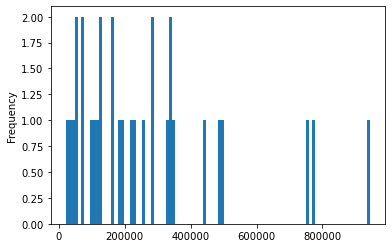

In [15]:
hao['T7_est1'].plot.hist(bins=100)

There are a lot of counties with lower than 400,000 units of houses in the survey. Some counties have more than 600,000 units of houses.

Let's sort this column from the biggest number to the lowest and see what are the top 10 counties with most number of houses with `.sort_values` and `.head`. We need to set the "ascending" as False since we want the biggest numbers instead of the smallest numbers from the dataset. 

In [16]:
hao_sorted = hao.sort_values(by='T7_est1',ascending = False)

In [17]:
hao_sorted[['name','T7_est1']].head(10)

,name,T7_est1
15,"Kings County, New York",944650
20,"Queens County, New York",777905
17,"New York County, New York",758345
13,"Bronx County, New York",495355
23,"Suffolk County, New York",489330
16,"Nassau County, New York",444135
25,"Westchester County, New York",345885
1,"Bergen County, New Jersey",337820
26,"Fairfield County, Connecticut",337680
28,"New Haven County, Connecticut",327400


You can see from this analysis that the top 7 counties are all in New York State, and the 8th county with most amount of houses is Bergen County in New Jersey (cross from Manhattan).

Let's put the top 10 counties with most amount of houses in New York Metro Area in the bar graph with `.plot.bar(x,y)`.

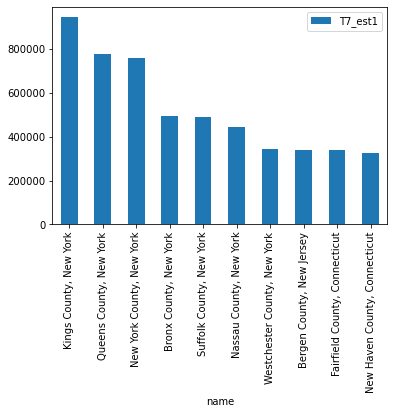

In [18]:
# plot it
hao_sorted.head(10).plot.bar(x='name',
                            y='T7_est1')

Let's now import the county boundary map of New York Metro Area because I want to plot the hosuing distribution and housing affordability across thie region.

In [19]:
tracts=gpd.read_file('NYMRcb/county.shp')
tracts.head()

,cartodb_id,statefp,countyfp,geoid,name,subregid,atotal,aland,pop_10e,pop_10m,pop_10c,pop_19e,pop_19m,pop_19c,pop_1019e,pop_1019m,pop_1019c,popp_1019e,popp_1019m,popp_1019c,popd_19e,popd_19m,popd_19c,popfb_18e,popfb_18m,popfb_18c,popfbp_18e,popfbp_18m,popfbp_18c,lf_10e,lf_10m,lf_10c,lf_18e,lf_18m,lf_18c,lf_1018e,lf_1018m,lf_1018c,lfpw_10e,lfpw_10m,lfpw_10c,lfpw_18e,lfpw_18m,lfpw_18c,lfpw_1018e,lfpw_1018m,lfpw_1018c,lf65_10e,lf65_10m,lf65_10c,lf65_18e,lf65_18m,lf65_18c,lf65_1018e,lf65_1018m,lf65_1018c,hou_00e,hou_19e,hou_19m,hou_19c,houo_18e,houo_18m,houo_18c,hour_18e,hour_18m,hour_18c,houv_18e,houv_18m,houv_18c,hou1u_18e,hou1u_18m,hou1u_18c,hou24u_18e,hou24u_18m,hou24u_18c,hou5u_18e,hou5u_18m,hou5u_18c,hp_1019,hp1_1019,hp24_1019,hp5_1019,emtot_00,emtot_08,emtot_19,empr_00,empr_08,empr_19,emoff_19,empuins_19,emins_19,emind_19,emser_19,emtot_0019,emtot_0819,empr_0019,empr_0819,emoff_0819,emins_0819,emind_0819,emser_0819,gdp_18,gdp_0818,gdppa_0818,bal_00,bal_19,bal_0019,cw_bx_e,cw_bx_m,cw_bx_c,cw_bk_e,cw_bk_m,cw_bk_c,cw_mn_e,cw_mn_m,cw_mn_c,cw_qn_e,cw_qn_m,cw_qn_c,cw_si_e,cw_si_m,cw_si_c,cw_nyc_e,cw_nyc_m,cw_nyc_c,cr_bx_e,cr_bx_m,cr_bx_c,cr_bk_e,cr_bk_m,cr_bk_c,cr_mn_e,cr_mn_m,cr_mn_c,cr_qn_e,cr_qn_m,cr_qn_c,cr_si_e,cr_si_m,cr_si_c,cr_nyc_e,cr_nyc_m,cr_nyc_c,cw_0018_e,cw_0018_m,cw_0018_c,cmn_car_e,cmn_car_m,cmn_car_c,cmn_bus_e,cmn_bus_m,cmn_bus_c,cmn_rai_e,cmn_rai_m,cmn_rai_c,cmn_sub_e,cmn_sub_m,cmn_sub_c,cmn_fer_e,cmn_fer_m,cmn_fer_c,cmn_bw_e,cmn_bw_m,cmn_bw_c,cmn_oth_e,cmn_oth_m,cmn_oth_c,cmn_hom_e,cmn_hom_m,cmn_hom_c,cnmn_car_e,cnmn_car_m,cnmn_car_c,cnmn_bus_e,cnmn_bus_m,cnmn_bus_c,cnmn_rai_e,cnmn_rai_m,cnmn_rai_c,cnmn_sub_e,cnmn_sub_m,cnmn_sub_c,cnmn_fer_e,cnmn_fer_m,cnmn_fer_c,cnmn_bw_e,cnmn_bw_m,cnmn_bw_c,cnmn_oth_e,cnmn_oth_m,cnmn_oth_c,cnmn_hom_e,cnmn_hom_m,cnmn_hom_c,cr_car_e,cr_car_m,cr_car_c,cr_bus_e,cr_bus_m,cr_bus_c,cr_rai_e,cr_rai_m,cr_rai_c,cr_sub_e,cr_sub_m,cr_sub_c,cr_fer_e,cr_fer_m,cr_fer_c,cr_bw_e,cr_bw_m,cr_bw_c,cr_oth_e,cr_oth_m,cr_oth_c,cr_hom_e,cr_hom_m,cr_hom_c,iscommap,iscomnycre,iscomnycwo,geometry
0,1,09,001,09001,"Fairfield County, Connecticut",CT,836.91795,624.96958,916829,0,0,943332,0,0,26503,0,0,0.028907,0,0,1509.404666,0,0,205009,3336,0.989207,0.217091,0.003533,0.989207,475682,2304,0.294442,511280,2316,0.275368,35598,3266.844349,5.578751,320032,1467.318302,0.278718,313972,1492.376628,0.288949,-6060,2092.895363,20.994667,25310,849.463360,2.040265,35348,985.406515,1.694668,10038,1301.004996,7.878905,339466,375360,0,0,227097,3985,1.066721,118537,4348,2.229819,28846,3145,6.627796,235227,4490.525582,1.160497,62217,4283.318340,4.185096,75646,4091.517445,3.288006,18034,7285,645,10104,428461,419353,417726,384757,372192,373137,117566,28013,77000,67665,110906,-10735,-1627,-11620,945,-5595,11978,-14561,9122,89.387658,-7.291615,-0.007542,0.792291,0.898579,0.106288,2206,795.076252,21.909747,2660,1071.537078,24.488358,33476,3072.087488,5.578714,1731,755.366106,26.527390,0,0.000000,0.000000,40073,3433.458525,5.208517,1617,1069.311686,40.200216,1412,694.430764,29.897051,4474,1408.926127,19.143720,2138,888.623610,25.266451,156,196.196854,76.454234,9797,2106.864856,13.073072,11202,2562.486280,13.905931,4097,1054.167097,15.641471,1268,855.841031,41.030608,27396,2828.090535,6.275383,503,328.137713,39.657219,0,0.000000,0.000000,62,102.102700,100.110501,150,170.630990,69.151364,0,0.0,0.0,3993,1182.602902,18.004196,0,0.000000,0.000000,2398,1104.572240,28.001355,206,193.694122,57.158829,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,5830,1678.142338,17.498239,316,289.335814,55.660770,2740,1317.277237,29.225417,333,315.997178,57.686351,0,0.000000,0.00000,234,331.739038,86.181653,344,363.225722,64.187765,0,0.000000,0.000000,0,1,1,"MULTIPOLYGON (((-73.60428 41.01486, -73.60471 ..."
1,10,34,025,34025,"Monmouth County, New Jersey",ONJ,665.31546,468.40775,630380,0,0,618795,0,0,-11585,0,0,-0.018378,0,0,1321.060550,0,0,83067,2180,1.595372,0.133251,0.003497,1.595372,332855,1979,0.361431,333518,2003

In [20]:
tracts.shape

(33, 222)

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
tracts.sample(33)

,cartodb_id,statefp,countyfp,geoid,name,subregid,atotal,aland,pop_10e,pop_10m,pop_10c,pop_19e,pop_19m,pop_19c,pop_1019e,pop_1019m,pop_1019c,popp_1019e,popp_1019m,popp_1019c,popd_19e,popd_19m,popd_19c,popfb_18e,popfb_18m,popfb_18c,popfbp_18e,popfbp_18m,popfbp_18c,lf_10e,lf_10m,lf_10c,lf_18e,lf_18m,lf_18c,lf_1018e,lf_1018m,lf_1018c,lfpw_10e,lfpw_10m,lfpw_10c,lfpw_18e,lfpw_18m,lfpw_18c,lfpw_1018e,lfpw_1018m,lfpw_1018c,lf65_10e,lf65_10m,lf65_10c,lf65_18e,lf65_18m,lf65_18c,lf65_1018e,lf65_1018m,lf65_1018c,hou_00e,hou_19e,hou_19m,hou_19c,houo_18e,houo_18m,houo_18c,hour_18e,hour_18m,hour_18c,houv_18e,houv_18m,houv_18c,hou1u_18e,hou1u_18m,hou1u_18c,hou24u_18e,hou24u_18m,hou24u_18c,hou5u_18e,hou5u_18m,hou5u_18c,hp_1019,hp1_1019,hp24_1019,hp5_1019,emtot_00,emtot_08,emtot_19,empr_00,empr_08,empr_19,emoff_19,empuins_19,emins_19,emind_19,emser_19,emtot_0019,emtot_0819,empr_0019,empr_0819,emoff_0819,emins_0819,emind_0819,emser_0819,gdp_18,gdp_0818,gdppa_0818,bal_00,bal_19,bal_0019,cw_bx_e,cw_bx_m,cw_bx_c,cw_bk_e,cw_bk_m,cw_bk_c,cw_mn_e,cw_mn_m,cw_mn_c,cw_qn_e,cw_qn_m,cw_qn_c,cw_si_e,cw_si_m,cw_si_c,cw_nyc_e,cw_nyc_m,cw_nyc_c,cr_bx_e,cr_bx_m,cr_bx_c,cr_bk_e,cr_bk_m,cr_bk_c,cr_mn_e,cr_mn_m,cr_mn_c,cr_qn_e,cr_qn_m,cr_qn_c,cr_si_e,cr_si_m,cr_si_c,cr_nyc_e,cr_nyc_m,cr_nyc_c,cw_0018_e,cw_0018_m,cw_0018_c,cmn_car_e,cmn_car_m,cmn_car_c,cmn_bus_e,cmn_bus_m,cmn_bus_c,cmn_rai_e,cmn_rai_m,cmn_rai_c,cmn_sub_e,cmn_sub_m,cmn_sub_c,cmn_fer_e,cmn_fer_m,cmn_fer_c,cmn_bw_e,cmn_bw_m,cmn_bw_c,cmn_oth_e,cmn_oth_m,cmn_oth_c,cmn_hom_e,cmn_hom_m,cmn_hom_c,cnmn_car_e,cnmn_car_m,cnmn_car_c,cnmn_bus_e,cnmn_bus_m,cnmn_bus_c,cnmn_rai_e,cnmn_rai_m,cnmn_rai_c,cnmn_sub_e,cnmn_sub_m,cnmn_sub_c,cnmn_fer_e,cnmn_fer_m,cnmn_fer_c,cnmn_bw_e,cnmn_bw_m,cnmn_bw_c,cnmn_oth_e,cnmn_oth_m,cnmn_oth_c,cnmn_hom_e,cnmn_hom_m,cnmn_hom_c,cr_car_e,cr_car_m,cr_car_c,cr_bus_e,cr_bus_m,cr_bus_c,cr_rai_e,cr_rai_m,cr_rai_c,cr_sub_e,cr_sub_m,cr_sub_c,cr_fer_e,cr_fer_m,cr_fer_c,cr_bw_e,cr_bw_m,cr_bw_c,cr_oth_e,cr_oth_m,cr_oth_c,cr_hom_e,cr_hom_m,cr_hom_c,iscommap,iscomnycre,iscomnycwo,geometry
21,6,34,017,34017,"Hudson County, New Jersey",INJ,62.36689,46.16745,634266,0,0,672391,0,0,38125,0,0,0.060109,0,0,14564.178870,0,0,285998,3365,0.715247,0.427737,0.005033,0.715247,352106,2380,0.410901,375306,2372,0.384205,23200,3360.176186,8.804570,259205,1438.927031,0.337466,277526,1521.218919,0.333213,18321,2093.947946,6.947856,11149,660.196183,3.599740,13210,747.169325,3.438352,2061,997.056167,29.408693,240618,286918,0,0,87480,3917,2.721942,176444,4104,1.413952,20200,2237,6.732071,40503,2902.028256,4.355606,99210,4476.006479,2.742643,143810,5494.384406,2.322545,39937,4664,1972,33301,239167,236008,269532,203041,196792,230900,87544,15237,34530,51004,57825,30365,33524,27859,34108,12006,7730,-530,14906,51.575916,10.798382,0.026481,1.006067,1.064504,0.058438,2338,1119.382915,29.105044,9897,2073.569024,12.736468,108438,5625.998182,3.153931,2544,965.104060,23.061690,867,571.875443,40.097422,124084,6201.856941,3.038366,1829,767.014304,25.493171,6851,1545.710356,13.715393,7917,2769.702381,21.267016,5324,1361.615301,15.547139,2730,1105.948988,24.626719,24651,3704.848461,9.136293,57730,3728.500644,3.926149,6467,1769.900902,16.637198,32595,4274.282625,7.971616,8364,2005.066099,14.572993,52634,3896.521712,4.500335,6834,1684.569517,14.984700,920,606.033606,40.044509,624,553.024559,53.875824,0,0.000000,0.000000,3873,1352.989200,21.236402,3317,1213.461710,22.238972,900,513.060574,34.654547,7308,1977.903495,16.452832,67,112.278932,101.872642,119,191.696502,97.926746,62,105.848432,103.783148,0,0.000000,0.000000,6639,1639.563999,15.012734,1907,930.307495,29.655819,158,159.185520,61.246401,13244,2289.261961,10.507767,412,456.746181,67.392537,805,543.629320,41.052640,1486,2117.748237,86.634249,0,0.000000,0.000000,0,1,1,"MULTIPOLYGON (((-74.14792 40.66034, -74.14797 ..."
8,3,09,009,09009,"New Haven County, Connecticut",CT,862.06191,604.49891,862477,0,0,854757,0,0,-7720,0,0,-0.008951,0,0,1413.992624,0,0,104939,3211,1.860105,0.12211

It looks like there are two rows in the dataframe that describe two geographic area that countails multiple counties, and do not help us with our analysis, so I will use `.drop` to drop those two columns. 

In [22]:
tracts = tracts.drop([7])

In [23]:
tracts = tracts.drop([32])

In [24]:
tracts.sample(31)

,cartodb_id,statefp,countyfp,geoid,name,subregid,atotal,aland,pop_10e,pop_10m,pop_10c,pop_19e,pop_19m,pop_19c,pop_1019e,pop_1019m,pop_1019c,popp_1019e,popp_1019m,popp_1019c,popd_19e,popd_19m,popd_19c,popfb_18e,popfb_18m,popfb_18c,popfbp_18e,popfbp_18m,popfbp_18c,lf_10e,lf_10m,lf_10c,lf_18e,lf_18m,lf_18c,lf_1018e,lf_1018m,lf_1018c,lfpw_10e,lfpw_10m,lfpw_10c,lfpw_18e,lfpw_18m,lfpw_18c,lfpw_1018e,lfpw_1018m,lfpw_1018c,lf65_10e,lf65_10m,lf65_10c,lf65_18e,lf65_18m,lf65_18c,lf65_1018e,lf65_1018m,lf65_1018c,hou_00e,hou_19e,hou_19m,hou_19c,houo_18e,houo_18m,houo_18c,hour_18e,hour_18m,hour_18c,houv_18e,houv_18m,houv_18c,hou1u_18e,hou1u_18m,hou1u_18c,hou24u_18e,hou24u_18m,hou24u_18c,hou5u_18e,hou5u_18m,hou5u_18c,hp_1019,hp1_1019,hp24_1019,hp5_1019,emtot_00,emtot_08,emtot_19,empr_00,empr_08,empr_19,emoff_19,empuins_19,emins_19,emind_19,emser_19,emtot_0019,emtot_0819,empr_0019,empr_0819,emoff_0819,emins_0819,emind_0819,emser_0819,gdp_18,gdp_0818,gdppa_0818,bal_00,bal_19,bal_0019,cw_bx_e,cw_bx_m,cw_bx_c,cw_bk_e,cw_bk_m,cw_bk_c,cw_mn_e,cw_mn_m,cw_mn_c,cw_qn_e,cw_qn_m,cw_qn_c,cw_si_e,cw_si_m,cw_si_c,cw_nyc_e,cw_nyc_m,cw_nyc_c,cr_bx_e,cr_bx_m,cr_bx_c,cr_bk_e,cr_bk_m,cr_bk_c,cr_mn_e,cr_mn_m,cr_mn_c,cr_qn_e,cr_qn_m,cr_qn_c,cr_si_e,cr_si_m,cr_si_c,cr_nyc_e,cr_nyc_m,cr_nyc_c,cw_0018_e,cw_0018_m,cw_0018_c,cmn_car_e,cmn_car_m,cmn_car_c,cmn_bus_e,cmn_bus_m,cmn_bus_c,cmn_rai_e,cmn_rai_m,cmn_rai_c,cmn_sub_e,cmn_sub_m,cmn_sub_c,cmn_fer_e,cmn_fer_m,cmn_fer_c,cmn_bw_e,cmn_bw_m,cmn_bw_c,cmn_oth_e,cmn_oth_m,cmn_oth_c,cmn_hom_e,cmn_hom_m,cmn_hom_c,cnmn_car_e,cnmn_car_m,cnmn_car_c,cnmn_bus_e,cnmn_bus_m,cnmn_bus_c,cnmn_rai_e,cnmn_rai_m,cnmn_rai_c,cnmn_sub_e,cnmn_sub_m,cnmn_sub_c,cnmn_fer_e,cnmn_fer_m,cnmn_fer_c,cnmn_bw_e,cnmn_bw_m,cnmn_bw_c,cnmn_oth_e,cnmn_oth_m,cnmn_oth_c,cnmn_hom_e,cnmn_hom_m,cnmn_hom_c,cr_car_e,cr_car_m,cr_car_c,cr_bus_e,cr_bus_m,cr_bus_c,cr_rai_e,cr_rai_m,cr_rai_c,cr_sub_e,cr_sub_m,cr_sub_c,cr_fer_e,cr_fer_m,cr_fer_c,cr_bw_e,cr_bw_m,cr_bw_c,cr_oth_e,cr_oth_m,cr_oth_c,cr_hom_e,cr_hom_m,cr_hom_c,iscommap,iscomnycre,iscomnycwo,geometry
4,19,36,027,36027,"Dutchess County, New York",MHV,825.34308,795.63519,297488,0,0,294218,0,0,-3270,0,0,-0.010992,0,0,369.790079,0,0,33754,1315,2.368288,0.114851,0.004474,2.368288,153872,1532,0.605248,153137,1580,0.627207,-735,2200.778044,182.021632,101391,855.871486,0.513149,91997,881.948411,0.582779,-9394,1228.962571,7.952839,6626,483.381837,4.434789,9414,488.936601,3.157275,2788,687.544180,14.991391,106103,121574,0,0,73717,2263,1.866169,34354,2242,3.967276,13116,2049,9.496742,83877,2682.622784,1.944244,13292,1896.993674,8.675802,19536,2147.779784,6.683258,3994,2745,97,1152,110123,115212,113660,88364,92864,94198,15974,8773,28940,18922,30362,3537,-1552,5834,1334,116,4884,-6770,3104,14.038485,1.200872,0.009354,0.963495,1.069629,0.106133,1876,1178.984307,38.204040,664,646.064195,59.148222,7333,1739.797643,14.422852,29,47.290531,99.131184,363,425.983541,71.337895,10265,2240.088648,13.266011,0,0.000000,0.000000,197,321.644827,99.253183,273,451.000083,100.426441,265,256.505826,58.841733,0,0.000000,0.000000,735,610.452053,50.489180,4772,1125.348296,14.335757,2130,954.571828,27.243513,44,72.240602,99.807408,4727,1348.506798,17.342098,362,286.680602,48.141967,0,0.000000,0.000000,0,0.000000,0.000000,70,125.868301,109.308121,0,0.000000,0.000000,2802,1279.291445,27.754631,0,0.000000,0.000000,64,72.461270,68.827194,66,110.957049,102.198626,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,585,584.336788,60.721356,0,0.000000,0.000000,73,123.192819,102.588016,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,77,132.008047,104.218251,0,0.000000,0.000000,0,1,1,"POLYGON ((-73.48731 42.04964, -73.48731 42.049..."
12,16,34,039,34039,"Union County, New Jersey",INJ,105.40494,102.86728,536499,0,0,556341,0,0,19842,0,0,0.036984,0,0,5408.337812,0,0,165678,3326,1.220370,0.299563,0.006014,1.220370,281712,2041,0.440425,299008,1971,0.400717,17296,2837.344181,9.972417,195234,1174.203134,0.365613,19574

Now we have a much cleaner dataframe to work with.

In [25]:
tracts.dtypes

cartodb_id       int64
statefp         object
countyfp        object
geoid           object
name            object
subregid        object
atotal         float64
aland          float64
pop_10e          int64
pop_10m          int64
pop_10c          int64
pop_19e          int64
pop_19m          int64
pop_19c          int64
pop_1019e        int64
pop_1019m        int64
pop_1019c        int64
popp_1019e     float64
popp_1019m       int64
popp_1019c       int64
popd_19e       float64
popd_19m         int64
popd_19c         int64
popfb_18e        int64
popfb_18m        int64
popfb_18c      float64
popfbp_18e     float64
popfbp_18m     float64
popfbp_18c     float64
lf_10e           int64
lf_10m           int64
lf_10c         float64
lf_18e           int64
lf_18m           int64
lf_18c         float64
lf_1018e         int64
lf_1018m       float64
lf_1018c       float64
lfpw_10e         int64
lfpw_10m       float64
lfpw_10c       float64
lfpw_18e         int64
lfpw_18m       float64
lfpw_18c   

You can see from the first 5 rows in this dataset that there is no FIPS code, rather there is "countyfp" and "statefp" columns for each county. We need to combine them together and form a new column with the FIPS code. Since we know that those two existing columns are the same type of data, we can combine them. 

In [26]:
tracts["FIPS"]=tracts["statefp"]+tracts["countyfp"]

In [27]:
tracts.head()

,cartodb_id,statefp,countyfp,geoid,name,subregid,atotal,aland,pop_10e,pop_10m,pop_10c,pop_19e,pop_19m,pop_19c,pop_1019e,pop_1019m,pop_1019c,popp_1019e,popp_1019m,popp_1019c,popd_19e,popd_19m,popd_19c,popfb_18e,popfb_18m,popfb_18c,popfbp_18e,popfbp_18m,popfbp_18c,lf_10e,lf_10m,lf_10c,lf_18e,lf_18m,lf_18c,lf_1018e,lf_1018m,lf_1018c,lfpw_10e,lfpw_10m,lfpw_10c,lfpw_18e,lfpw_18m,lfpw_18c,lfpw_1018e,lfpw_1018m,lfpw_1018c,lf65_10e,lf65_10m,lf65_10c,lf65_18e,lf65_18m,lf65_18c,lf65_1018e,lf65_1018m,lf65_1018c,hou_00e,hou_19e,hou_19m,hou_19c,houo_18e,houo_18m,houo_18c,hour_18e,hour_18m,hour_18c,houv_18e,houv_18m,houv_18c,hou1u_18e,hou1u_18m,hou1u_18c,hou24u_18e,hou24u_18m,hou24u_18c,hou5u_18e,hou5u_18m,hou5u_18c,hp_1019,hp1_1019,hp24_1019,hp5_1019,emtot_00,emtot_08,emtot_19,empr_00,empr_08,empr_19,emoff_19,empuins_19,emins_19,emind_19,emser_19,emtot_0019,emtot_0819,empr_0019,empr_0819,emoff_0819,emins_0819,emind_0819,emser_0819,gdp_18,gdp_0818,gdppa_0818,bal_00,bal_19,bal_0019,cw_bx_e,cw_bx_m,cw_bx_c,cw_bk_e,cw_bk_m,cw_bk_c,cw_mn_e,cw_mn_m,cw_mn_c,cw_qn_e,cw_qn_m,cw_qn_c,cw_si_e,cw_si_m,cw_si_c,cw_nyc_e,cw_nyc_m,cw_nyc_c,cr_bx_e,cr_bx_m,cr_bx_c,cr_bk_e,cr_bk_m,cr_bk_c,cr_mn_e,cr_mn_m,cr_mn_c,cr_qn_e,cr_qn_m,cr_qn_c,cr_si_e,cr_si_m,cr_si_c,cr_nyc_e,cr_nyc_m,cr_nyc_c,cw_0018_e,cw_0018_m,cw_0018_c,cmn_car_e,cmn_car_m,cmn_car_c,cmn_bus_e,cmn_bus_m,cmn_bus_c,cmn_rai_e,cmn_rai_m,cmn_rai_c,cmn_sub_e,cmn_sub_m,cmn_sub_c,cmn_fer_e,cmn_fer_m,cmn_fer_c,cmn_bw_e,cmn_bw_m,cmn_bw_c,cmn_oth_e,cmn_oth_m,cmn_oth_c,cmn_hom_e,cmn_hom_m,cmn_hom_c,cnmn_car_e,cnmn_car_m,cnmn_car_c,cnmn_bus_e,cnmn_bus_m,cnmn_bus_c,cnmn_rai_e,cnmn_rai_m,cnmn_rai_c,cnmn_sub_e,cnmn_sub_m,cnmn_sub_c,cnmn_fer_e,cnmn_fer_m,cnmn_fer_c,cnmn_bw_e,cnmn_bw_m,cnmn_bw_c,cnmn_oth_e,cnmn_oth_m,cnmn_oth_c,cnmn_hom_e,cnmn_hom_m,cnmn_hom_c,cr_car_e,cr_car_m,cr_car_c,cr_bus_e,cr_bus_m,cr_bus_c,cr_rai_e,cr_rai_m,cr_rai_c,cr_sub_e,cr_sub_m,cr_sub_c,cr_fer_e,cr_fer_m,cr_fer_c,cr_bw_e,cr_bw_m,cr_bw_c,cr_oth_e,cr_oth_m,cr_oth_c,cr_hom_e,cr_hom_m,cr_hom_c,iscommap,iscomnycre,iscomnycwo,geometry,FIPS
0,1,09,001,09001,"Fairfield County, Connecticut",CT,836.91795,624.96958,916829,0,0,943332,0,0,26503,0,0,0.028907,0,0,1509.404666,0,0,205009,3336,0.989207,0.217091,0.003533,0.989207,475682,2304,0.294442,511280,2316,0.275368,35598,3266.844349,5.578751,320032,1467.318302,0.278718,313972,1492.376628,0.288949,-6060,2092.895363,20.994667,25310,849.463360,2.040265,35348,985.406515,1.694668,10038,1301.004996,7.878905,339466,375360,0,0,227097,3985,1.066721,118537,4348,2.229819,28846,3145,6.627796,235227,4490.525582,1.160497,62217,4283.318340,4.185096,75646,4091.517445,3.288006,18034,7285,645,10104,428461,419353,417726,384757,372192,373137,117566,28013,77000,67665,110906,-10735,-1627,-11620,945,-5595,11978,-14561,9122,89.387658,-7.291615,-0.007542,0.792291,0.898579,0.106288,2206,795.076252,21.909747,2660,1071.537078,24.488358,33476,3072.087488,5.578714,1731,755.366106,26.527390,0,0.000000,0.000000,40073,3433.458525,5.208517,1617,1069.311686,40.200216,1412,694.430764,29.897051,4474,1408.926127,19.143720,2138,888.623610,25.266451,156,196.196854,76.454234,9797,2106.864856,13.073072,11202,2562.486280,13.905931,4097,1054.167097,15.641471,1268,855.841031,41.030608,27396,2828.090535,6.275383,503,328.137713,39.657219,0,0.000000,0.000000,62,102.102700,100.110501,150,170.630990,69.151364,0,0.0,0.0,3993,1182.602902,18.004196,0,0.000000,0.000000,2398,1104.572240,28.001355,206,193.694122,57.158829,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,5830,1678.142338,17.498239,316,289.335814,55.660770,2740,1317.277237,29.225417,333,315.997178,57.686351,0,0.000000,0.00000,234,331.739038,86.181653,344,363.225722,64.187765,0,0.000000,0.000000,0,1,1,"MULTIPOLYGON (((-73.60428 41.01486, -73.60471 ...",09001
1,10,34,025,34025,"Monmouth County, New Jersey",ONJ,665.31546,468.40775,630380,0,0,618795,0,0,-11585,0,0,-0.018378,0,0,1321.060550,0,0,83067,2180,1.595372,0.133251,0.003497,1.595372,332855,1979,0.361431,

Let's check the data type again for the newly generated column "FIPS"

In [28]:
tracts.dtypes

cartodb_id       int64
statefp         object
countyfp        object
geoid           object
name            object
subregid        object
atotal         float64
aland          float64
pop_10e          int64
pop_10m          int64
pop_10c          int64
pop_19e          int64
pop_19m          int64
pop_19c          int64
pop_1019e        int64
pop_1019m        int64
pop_1019c        int64
popp_1019e     float64
popp_1019m       int64
popp_1019c       int64
popd_19e       float64
popd_19m         int64
popd_19c         int64
popfb_18e        int64
popfb_18m        int64
popfb_18c      float64
popfbp_18e     float64
popfbp_18m     float64
popfbp_18c     float64
lf_10e           int64
lf_10m           int64
lf_10c         float64
lf_18e           int64
lf_18m           int64
lf_18c         float64
lf_1018e         int64
lf_1018m       float64
lf_1018c       float64
lfpw_10e         int64
lfpw_10m       float64
lfpw_10c       float64
lfpw_18e         int64
lfpw_18m       float64
lfpw_18c   

At  the very bottom of the list, you can see that the data type of FIPS is object, but in the housing data frame we analyzed at the beginning, we know that FIPS is an integer. I'm going to try to convert FIPS with `.astype(str).astype(int)` in this data frame to integer so I can merge the two dataframe through the share FIPS. 

In [29]:
tracts["FIPS"] = tracts["FIPS"].astype(str).astype(int)

In [30]:
tracts.dtypes

cartodb_id       int64
statefp         object
countyfp        object
geoid           object
name            object
subregid        object
atotal         float64
aland          float64
pop_10e          int64
pop_10m          int64
pop_10c          int64
pop_19e          int64
pop_19m          int64
pop_19c          int64
pop_1019e        int64
pop_1019m        int64
pop_1019c        int64
popp_1019e     float64
popp_1019m       int64
popp_1019c       int64
popd_19e       float64
popd_19m         int64
popd_19c         int64
popfb_18e        int64
popfb_18m        int64
popfb_18c      float64
popfbp_18e     float64
popfbp_18m     float64
popfbp_18c     float64
lf_10e           int64
lf_10m           int64
lf_10c         float64
lf_18e           int64
lf_18m           int64
lf_18c         float64
lf_1018e         int64
lf_1018m       float64
lf_1018c       float64
lfpw_10e         int64
lfpw_10m       float64
lfpw_10c       float64
lfpw_18e         int64
lfpw_18m       float64
lfpw_18c   

In [56]:
tracts.FIPS.unique()

array([ 9001, 34025, 36081,  9005, 36027, 36087, 36059,  9009, 36079,
       36103, 36071, 34039, 34029, 34013, 34027, 36005, 34041, 34023,
       36047, 34003, 34017, 36085, 36119, 34037, 34035, 34031, 36105,
       36061, 34021, 34019, 36111])

Now you can see FIPS is an integer, and we can merge it with the FIPS from the housing data frame.

Let's plot the tracts with `.plot`

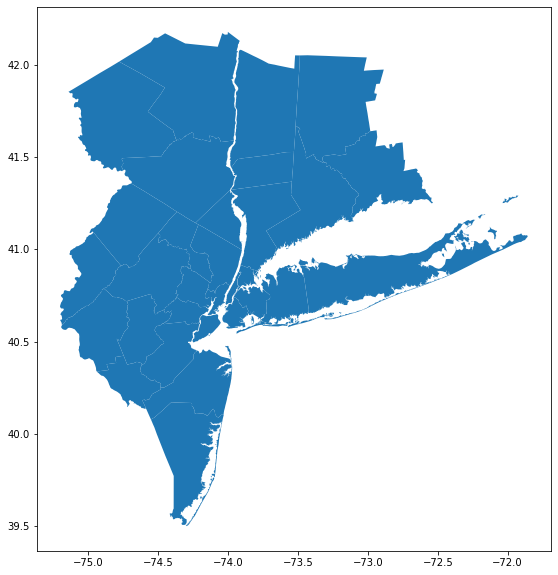

In [31]:
tracts.plot(figsize=(12,10))

Let's now merge the hao and tracts dataframe together on "FIPS", with `.merge`, and create a new dataframe "tracts_owner1"

In [32]:
tracts_owner1=tracts.merge(hao,on="FIPS")

Let's do some mapping! I want to show the difference in housing burden for owner occupied small family housing units whose owners have less then 30% of median income.

Text(0.5, 0.98, 'Affordability of Owner-Occupied non-elder small family wih HH income less than or equal to 30% HAMFI')

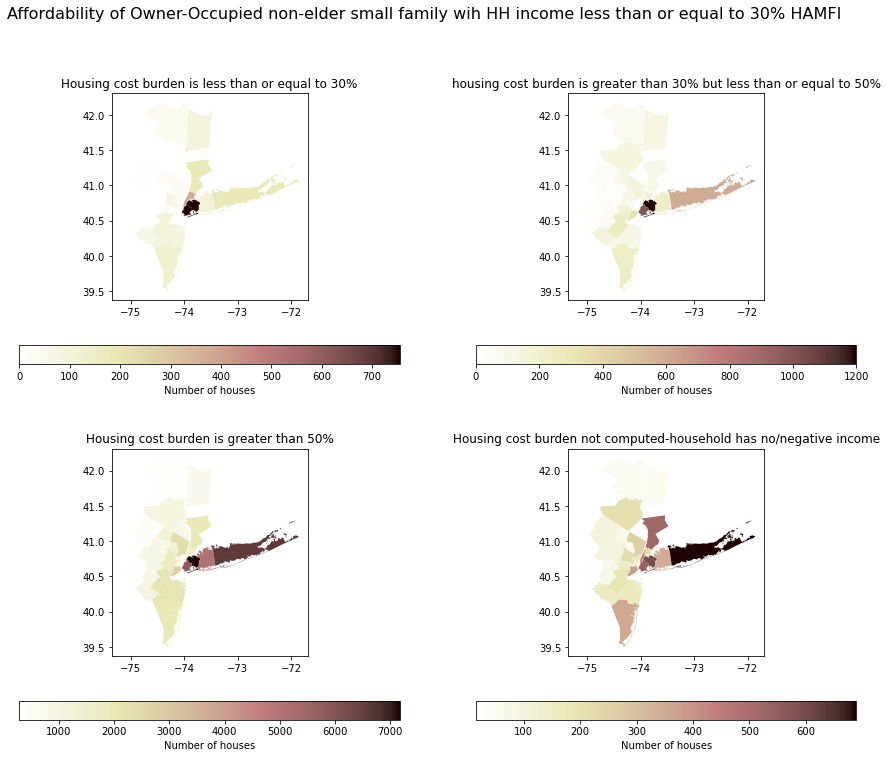

In [33]:
# create the 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

(ax1, ax2), (ax3, ax4) = axs


tracts_owner1.plot(
    figsize=(15,12),
    cmap='pink_r',
    column='T7_est10',
    legend=True,
    ax=ax1,
    legend_kwds={'label': "Number of houses", 'orientation': "horizontal"}
)
ax1.set_title("Housing cost burden is less than or equal to 30%")
tracts_owner1.plot(
    figsize=(15, 12),
    cmap='pink_r',
    column='T7_est11',
    legend=True,
    ax=ax2,
    legend_kwds={'label': "Number of houses", 'orientation': "horizontal"}
)
ax2.set_title("housing cost burden is greater than 30% but less than or equal to 50%")
tracts_owner1.plot(
    figsize=(15, 12),
    cmap='pink_r',
    column='T7_est12',
    legend=True,
    ax=ax3,
     legend_kwds={'label': "Number of houses", 'orientation': "horizontal"}
)
ax3.set_title("Housing cost burden is greater than 50%")

tracts_owner1.plot(
    figsize=(15, 12),
    cmap='pink_r',
    column='T7_est13',
    legend=True,
    ax=ax4,
     legend_kwds={'label': "Number of houses", 'orientation': "horizontal"}
)
ax4.set_title("Housing cost burden not computed-household has no/negative income")

fig.suptitle('Affordability of Owner-Occupied non-elder small family wih HH income less than or equal to 30% HAMFI', fontsize=16)

Now we see on the map that for owner occupied houses with small families whose income is less than 30% of median income, there are many of them did not report the housing cost burden either becuase they have no income or negative income. Besides that group, in this income category, most families have a higher than 50% housing burden (*notice the different on the legend*). 

How about people with slightly higher income (30% to 50% median income)?

Text(0.5, 0.98, 'Affordability of Owner-Occupied non-elder small family wih HH income more than 30% and less than or equal to 50% HAMFI')

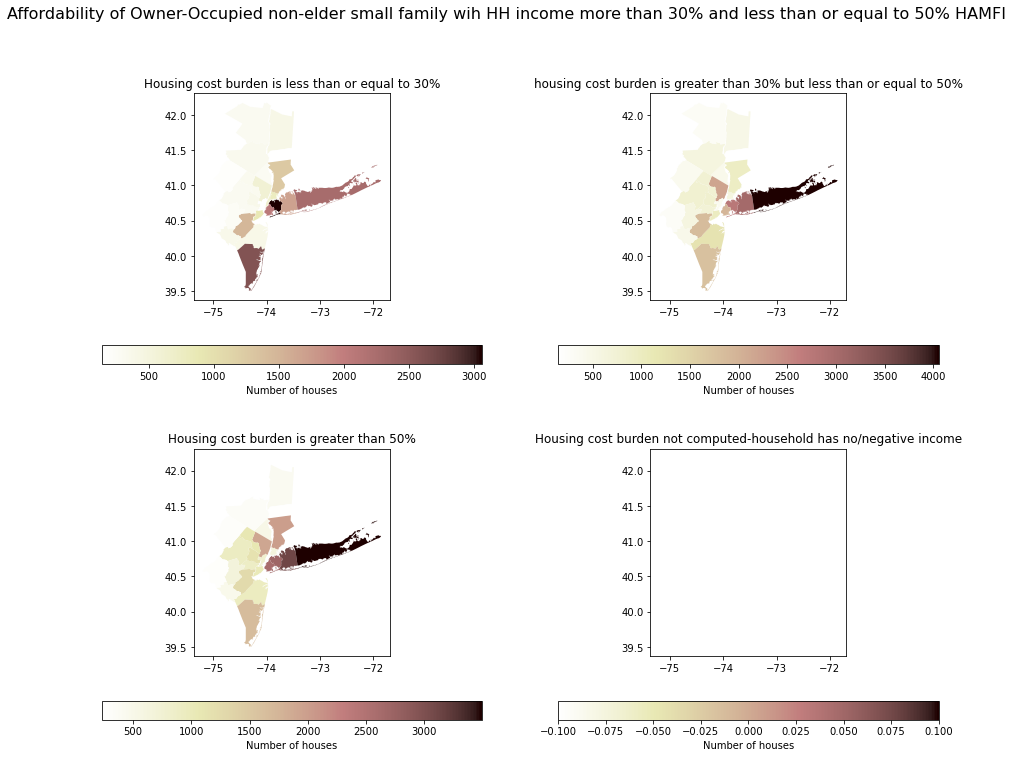

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

(ax1, ax2), (ax3, ax4) = axs


tracts_owner1.plot(
    figsize=(15,12),
    cmap='pink_r',
    column='T7_est31',
    legend=True,
    ax=ax1,
    legend_kwds={'label': "Number of houses", 'orientation': "horizontal"}
)
ax1.set_title("Housing cost burden is less than or equal to 30%")
tracts_owner1.plot(
    figsize=(15, 12),
    cmap='pink_r',
    column='T7_est32',
    legend=True,
    ax=ax2,
    legend_kwds={'label': "Number of houses", 'orientation': "horizontal"}
)
ax2.set_title("housing cost burden is greater than 30% but less than or equal to 50%")
tracts_owner1.plot(
    figsize=(15, 12),
    cmap='pink_r',
    column='T7_est33',
    legend=True,
    ax=ax3,
     legend_kwds={'label': "Number of houses", 'orientation': "horizontal"}
)
ax3.set_title("Housing cost burden is greater than 50%")

tracts_owner1.plot(
    figsize=(15, 12),
    cmap='pink_r',
    column='T7_est34',
    legend=True,
    ax=ax4,
     legend_kwds={'label': "Number of houses", 'orientation': "horizontal"}
)
ax4.set_title("Housing cost burden not computed-household has no/negative income")

fig.suptitle('Affordability of Owner-Occupied non-elder small family wih HH income more than 30% and less than or equal to 50% HAMFI', fontsize=16)

From 4 graphs, first thing I noticed is that the 4th graph is blank, meadning there is no housing burder un-computed, since this group has slightly higher income than the last (<30% median income). In addition, you can sse that for this groupd, most people reported that their housing burden is greater than 30% but less than or equal to 50%.

Now let's plot the total number of owner occupied houses for elder household type (2 persons, with either or both age 62 and over) with 30 to 50% median income

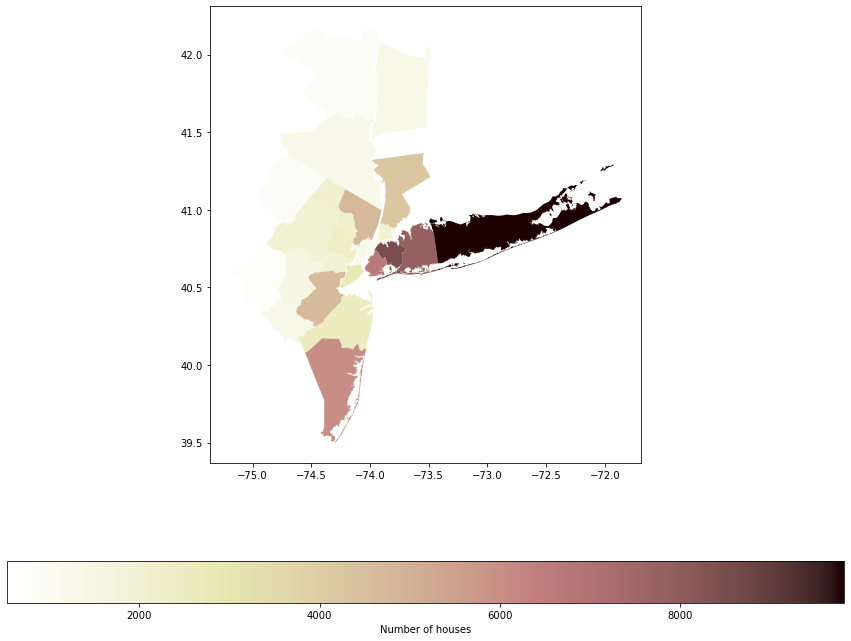

In [35]:
tracts_owner1.plot(
    figsize=(15,12),
    cmap='pink_r',
    column='T7_est30',
    legend=True,
    
    legend_kwds={'label': "Number of houses", 'orientation': "horizontal"}
)


You can see for this household group (elder) and housing type (owner occupied) and household income level (30-50%), many of them are living in the outer cities, rather in central manhattan. 

Let's now analyze the housing affordability of only owner occupied houses. I combed through the dataset from online, and created a new CSV file with only owner occupied housing units to speed up the processing.

In [143]:
hao1 = pd.read_csv('Book2.csv')

Let's take a quick look at the dataset

In [144]:
hao1.head()

,name,Unnamed: 1,st,#of HB<=30%,% of HB <30%,#HB30-50,%of HB30-50,#HB>50,%HB>50,#not computed,%not computed
0,"Mercer County, New Jersey",NaN,34021,42600,75,8750,15,5410,9,395,1
1,"Bergen County, New Jersey",NaN,34003,102390,69,26880,18,18565,12,745,1
2,"Essex County, New Jersey",NaN,34013,58335,66,16365,18,13410,15,490,1
3,"Hudson County, New Jersey",NaN,34017,38139,65,11880,20,8460,14,435,1
4,"Middlesex County, New Jersey",NaN,34023,92840,73,20930,17,12410,10,490,0


As you can see here, there are some columns I don't need for the analysis and I need to delete those and save the current dataframe as a new dataframe. 

In [148]:
list(hao1)

['name',
 'st',
 '#of HB<=30%',
 '% of HB <30%',
 '#HB30-50',
 '%of HB30-50',
 '#HB>50',
 '%HB>50',
 '#not computed',
 '%not computed']

In [149]:
columns_to_keep = ['name',
 'st',
 '#of HB<=30%',
 '% of HB <30%',
 '#HB30-50',
 '%of HB30-50',
 '#HB>50',
 '%HB>50',
 '#not computed',
 '%not computed']
hao1=hao1[columns_to_keep]

In [150]:
hao1.head()

,name,st,#of HB<=30%,% of HB <30%,#HB30-50,%of HB30-50,#HB>50,%HB>50,#not computed,%not computed
0,"Mercer County, New Jersey",34021,42600,75,8750,15,5410,9,395,1
1,"Bergen County, New Jersey",34003,102390,69,26880,18,18565,12,745,1
2,"Essex County, New Jersey",34013,58335,66,16365,18,13410,15,490,1
3,"Hudson County, New Jersey",34017,38139,65,11880,20,8460,14,435,1
4,"Middlesex County, New Jersey",34023,92840,73,20930,17,12410,10,490,0


Now we have column names as we desire.

Let's check the data types since I want to merge this dataframe with county boundary data frame on FIPS.

In [151]:
hao1.dtypes

name             object
st                int64
#of HB<=30%       int64
% of HB <30%      int64
#HB30-50          int64
%of HB30-50       int64
#HB>50            int64
%HB>50            int64
#not computed     int64
%not computed     int64
dtype: object

FIPS in this dataframe is an object and we need to convert it to integer as I did before to merge.

Since I want to merge hao1 dataframe with the county boundary data frame on FIPS, I need to change the column st to FIPS with `.rename.`

In [152]:
hao1=hao1.rename(columns = {"st": "FIPS"}, 
                                 inplace = False) 

Seems like it worked! Now we can merge tracts dataframe and the housing affordability dataframe with the `.merge`

In [153]:
tracts_owner=tracts.merge(hao1,on="FIPS")

Let's see what the dataframe is alike now

In [154]:
tracts_owner.head()

,cartodb_id,statefp,countyfp,geoid,name_x,subregid,atotal,aland,pop_10e,pop_10m,pop_10c,pop_19e,pop_19m,pop_19c,pop_1019e,pop_1019m,pop_1019c,popp_1019e,popp_1019m,popp_1019c,popd_19e,popd_19m,popd_19c,popfb_18e,popfb_18m,popfb_18c,popfbp_18e,popfbp_18m,popfbp_18c,lf_10e,lf_10m,lf_10c,lf_18e,lf_18m,lf_18c,lf_1018e,lf_1018m,lf_1018c,lfpw_10e,lfpw_10m,lfpw_10c,lfpw_18e,lfpw_18m,lfpw_18c,lfpw_1018e,lfpw_1018m,lfpw_1018c,lf65_10e,lf65_10m,lf65_10c,lf65_18e,lf65_18m,lf65_18c,lf65_1018e,lf65_1018m,lf65_1018c,hou_00e,hou_19e,hou_19m,hou_19c,houo_18e,houo_18m,houo_18c,hour_18e,hour_18m,hour_18c,houv_18e,houv_18m,houv_18c,hou1u_18e,hou1u_18m,hou1u_18c,hou24u_18e,hou24u_18m,hou24u_18c,hou5u_18e,hou5u_18m,hou5u_18c,hp_1019,hp1_1019,hp24_1019,hp5_1019,emtot_00,emtot_08,emtot_19,empr_00,empr_08,empr_19,emoff_19,empuins_19,emins_19,emind_19,emser_19,emtot_0019,emtot_0819,empr_0019,empr_0819,emoff_0819,emins_0819,emind_0819,emser_0819,gdp_18,gdp_0818,gdppa_0818,bal_00,bal_19,bal_0019,cw_bx_e,cw_bx_m,cw_bx_c,cw_bk_e,cw_bk_m,cw_bk_c,cw_mn_e,cw_mn_m,cw_mn_c,cw_qn_e,cw_qn_m,cw_qn_c,cw_si_e,cw_si_m,cw_si_c,cw_nyc_e,cw_nyc_m,cw_nyc_c,cr_bx_e,cr_bx_m,cr_bx_c,cr_bk_e,cr_bk_m,cr_bk_c,cr_mn_e,cr_mn_m,cr_mn_c,cr_qn_e,cr_qn_m,cr_qn_c,cr_si_e,cr_si_m,cr_si_c,cr_nyc_e,cr_nyc_m,cr_nyc_c,cw_0018_e,cw_0018_m,cw_0018_c,cmn_car_e,cmn_car_m,cmn_car_c,cmn_bus_e,cmn_bus_m,cmn_bus_c,cmn_rai_e,cmn_rai_m,cmn_rai_c,cmn_sub_e,cmn_sub_m,cmn_sub_c,cmn_fer_e,cmn_fer_m,cmn_fer_c,cmn_bw_e,cmn_bw_m,cmn_bw_c,cmn_oth_e,cmn_oth_m,cmn_oth_c,cmn_hom_e,cmn_hom_m,cmn_hom_c,cnmn_car_e,cnmn_car_m,cnmn_car_c,cnmn_bus_e,cnmn_bus_m,cnmn_bus_c,cnmn_rai_e,cnmn_rai_m,cnmn_rai_c,cnmn_sub_e,cnmn_sub_m,cnmn_sub_c,cnmn_fer_e,cnmn_fer_m,cnmn_fer_c,cnmn_bw_e,cnmn_bw_m,cnmn_bw_c,cnmn_oth_e,cnmn_oth_m,cnmn_oth_c,cnmn_hom_e,cnmn_hom_m,cnmn_hom_c,cr_car_e,cr_car_m,cr_car_c,cr_bus_e,cr_bus_m,cr_bus_c,cr_rai_e,cr_rai_m,cr_rai_c,cr_sub_e,cr_sub_m,cr_sub_c,cr_fer_e,cr_fer_m,cr_fer_c,cr_bw_e,cr_bw_m,cr_bw_c,cr_oth_e,cr_oth_m,cr_oth_c,cr_hom_e,cr_hom_m,cr_hom_c,iscommap,iscomnycre,iscomnycwo,geometry,FIPS,name_y,#of HB<=30%,% of HB <30%,#HB30-50,%of HB30-50,#HB>50,%HB>50,#not computed,%not computed
0,1,09,001,09001,"Fairfield County, Connecticut",CT,836.91795,624.96958,916829,0,0,943332,0,0,26503,0,0,0.028907,0,0,1509.404666,0,0,205009,3336,0.989207,0.217091,0.003533,0.989207,475682,2304,0.294442,511280,2316,0.275368,35598,3266.844349,5.578751,320032,1467.318302,0.278718,313972,1492.376628,0.288949,-6060,2092.895363,20.994667,25310,849.463360,2.040265,35348,985.406515,1.694668,10038,1301.004996,7.878905,339466,375360,0,0,227097,3985,1.066721,118537,4348,2.229819,28846,3145,6.627796,235227,4490.525582,1.160497,62217,4283.318340,4.185096,75646,4091.517445,3.288006,18034,7285,645,10104,428461,419353,417726,384757,372192,373137,117566,28013,77000,67665,110906,-10735,-1627,-11620,945,-5595,11978,-14561,9122,89.387658,-7.291615,-0.007542,0.792291,0.898579,0.106288,2206,795.076252,21.909747,2660,1071.537078,24.488358,33476,3072.087488,5.578714,1731,755.366106,26.527390,0,0.000000,0.000000,40073,3433.458525,5.208517,1617,1069.311686,40.200216,1412,694.430764,29.897051,4474,1408.926127,19.143720,2138,888.623610,25.266451,156,196.196854,76.454234,9797,2106.864856,13.073072,11202,2562.486280,13.905931,4097,1054.167097,15.641471,1268,855.841031,41.030608,27396,2828.090535,6.275383,503,328.137713,39.657219,0,0.000000,0.000000,62,102.102700,100.110501,150,170.630990,69.151364,0,0.0,0.0,3993,1182.602902,18.004196,0,0.000000,0.000000,2398,1104.572240,28.001355,206,193.694122,57.158829,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,5830,1678.142338,17.498239,316,289.335814,55.660770,2740,1317.277237,29.225417,333,315.997178,57.686351,0,0.000000,0.00000,234,331.739038,86.181653,344,363.225722,64.187765,0,0.000000,0.000000,0,1,1,"MULTIPOLYGON (((-73.60428 41.01486, -73.60471 ...",9001,"Fairfield County, Connecticut",111240,71,26315,17,18235,12,650,0
1,10,34,025,34025,"Monmouth County, New J

Let's plot the map

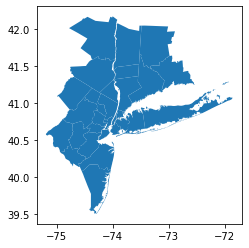

In [155]:
tracts_owner.plot()

Let's plot the housing affordability for owner-occupied housing in each county

Text(0.5, 0.98, 'Affordability of Owner-Occupied Housing Unites')

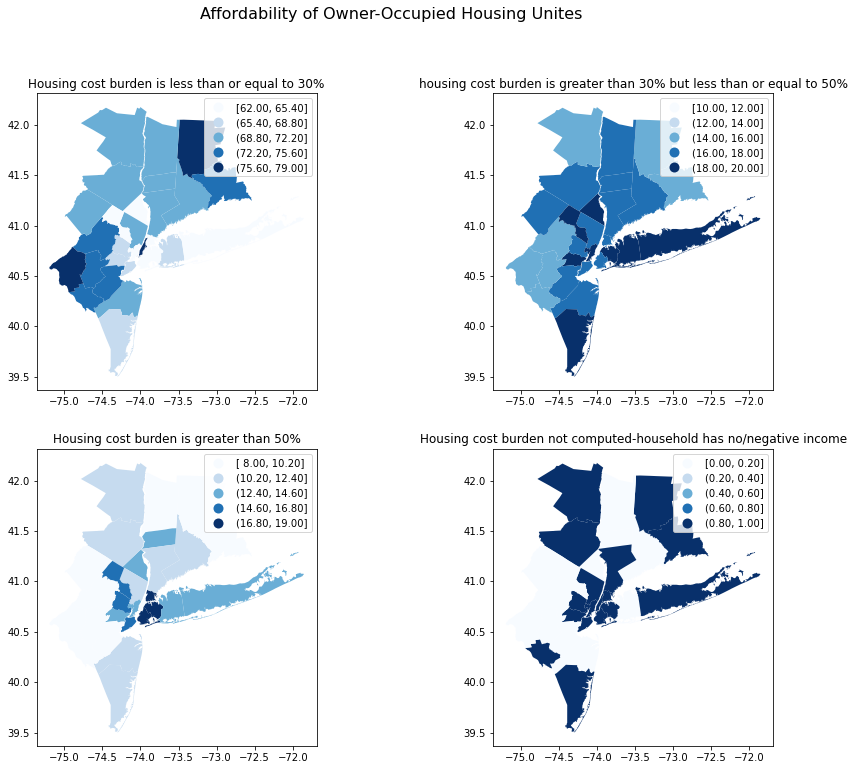

In [163]:
# create the 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

(ax1, ax2), (ax3, ax4) = axs


tracts_owner.plot(
    figsize=(15,12),
    cmap='Blues',
    ax=ax1,
    column= '% of HB <30%',
    legend = True,
    scheme='equal_interval'
    )

ax1.set_title("Housing cost burden is less than or equal to 30%")
tracts_owner.plot(
    figsize=(15, 12),
     ax=ax2,
    cmap='Blues',
    column='%of HB30-50',
    legend = True,
     scheme='equal_interval'
    )
                 
ax2.set_title("housing cost burden is greater than 30% but less than or equal to 50%")
tracts_owner.plot(
    figsize=(15, 12),
    cmap='Blues',
    column='%HB>50',
    legend = True,
    ax=ax3,
    scheme='equal_interval'
)
ax3.set_title("Housing cost burden is greater than 50%")

tracts_owner.plot(
    figsize=(15, 12),
    cmap='Blues',
    column='%not computed',
    legend = True,
    ax=ax4,
     scheme='equal_interval'
)
ax4.set_title("Housing cost burden not computed-household has no/negative income")

fig.suptitle('Affordability of Owner-Occupied Housing Unites', fontsize=16)